In [1]:
import json
from pandas import json_normalize
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import seaborn as sns

In [2]:
# !pip install statsbombpy
# !pip install mplsoccer

pd.set_option('display.max_seq_items', None)

In [3]:
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, Sbopen
# from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams

In [4]:
wc19 =pd.read_pickle('wc19.pkl')
wc19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         43744 non-null  int64  
 1   pass_angle                     43744 non-null  float64
 2   pass_length                    43744 non-null  float64
 3   pass_recipient                 43744 non-null  object 
 4   possession_team                43744 non-null  object 
 5   possession_team_id             43744 non-null  int64  
 6   player                         43744 non-null  object 
 7   player_id                      43744 non-null  float64
 8   match_id                       43744 non-null  int64  
 9   pass_outcome_Complete          43744 non-null  uint8  
 10  pass_outcome_Incomplete        43744 non-null  uint8  
 11  pass_outcome_Injury Clearance  43744 non-null  uint8  
 12  pass_outcome_Out               43744 non-null 

In [5]:
wc19.pass_outcome_Unknown.value_counts()

0    43577
1      167
Name: pass_outcome_Unknown, dtype: int64

In [6]:
euro22 =pd.read_pickle('euro22.pkl')
euro22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26002 entries, 0 to 26001
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         26002 non-null  int64  
 1   pass_angle                     26002 non-null  float64
 2   pass_length                    26002 non-null  float64
 3   pass_recipient                 26002 non-null  object 
 4   possession_team                26002 non-null  object 
 5   possession_team_id             26002 non-null  int64  
 6   player                         26002 non-null  object 
 7   player_id                      26002 non-null  float64
 8   match_id                       26002 non-null  int64  
 9   pass_outcome_Complete          26002 non-null  uint8  
 10  pass_outcome_Incomplete        26002 non-null  uint8  
 11  pass_outcome_Injury Clearance  26002 non-null  uint8  
 12  pass_outcome_Out               26002 non-null 

In [7]:
euro22.pass_outcome_Unknown.value_counts()


0    25959
1       43
Name: pass_outcome_Unknown, dtype: int64

In [8]:
#pitch = Pitch(pitch_type = 'statsbomb', pitch_color='#38383b',line_color='white', constrained_layout=False, tight_layout=True,view='full')

In [9]:
#Find the passes
#Draw the pitch

def playerpasses(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 0:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        

# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='completed passes')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='other passes')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30)

In [10]:
#Find the passes
#Draw the pitch

def playerpasses_inhalves(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['period'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['period'] == 2:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        
                             

            
# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='first half')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='second half')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30, color = 'w')

In [11]:
#Find the passes
#Draw the pitch

def prog_passes(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['end_x'] > thepass['start_x']:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        if thepass['player']==name and thepass['end_x'] < thepass['start_x']:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                         ax=ax)
        
            
            

            
# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='progressive passes')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='other passes')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30, color = 'w')

In [12]:
pd.set_option('display.max_seq_items', None)
wc19['player'].value_counts().head(60)

Lucy Bronze                               526
Desiree van Lunteren                      471
Sherida Spitse                            451
Stephanie Houghton                        435
Dominique Johanna Anna Petrone Janssen    398
Abby Dahlkemper                           366
Sara Caroline Seger                       353
Jackie Groenen                            336
Crystal Alyssia Dunn Soubrier             334
Magdalena Lilly Eriksson                  333
Nilla Fischer                             324
Hanna Erica Maria Glas                    319
Emily Louise van Egmond                   315
Amel Majri                                312
Jill Scott                                309
Alanna Stephanie Kennedy                  309
Danielle van de Donk                      303
Kelley Maureen O''Hara                    297
Stephanie van der Gragt                   296
Wendie Renard                             295
Linda Brigitta Sembrant                   295
Rebecca Elizabeth Sauerbrunn      

### Extract england womens passing patterns - World Cup 2019

In [13]:
columns_final = [#'player_id',
                 #'possession_team_id',
                 'period',
                 #'match_id',
                 #'pass_outcome_Complete',
                 'pass_angle',
                 'pass_length',
                 'start_x', 
                 'start_y', 
                 'end_x', 
                 'end_y',
                 'pass_height_Ground Pass', 
                 'pass_height_High Pass',
                 'pass_height_Low Pass']

# to add : period (to determine which half), 'match_id' to determine opponent

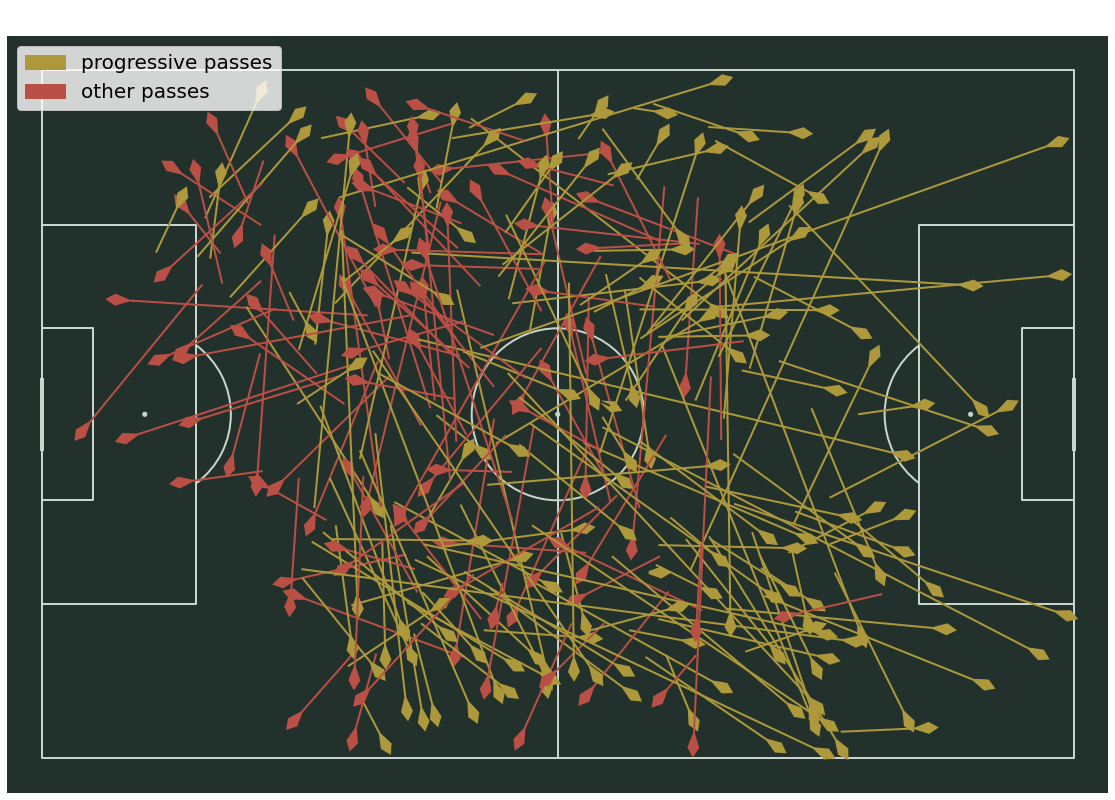

In [14]:
prog_passes('Keira Walsh', wc19)

### Kmeans - Keira Walsh wc19

In [15]:
passes = wc19[(wc19['player_id'] == 4658) & 
                  #(wc19['period'] == 1) &
                 (wc19['pass_outcome_Complete'] == 1)][columns_final]

In [16]:
passes.describe()

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,1.408696,-0.032167,19.984967,54.777391,38.298696,56.605652,40.810000,0.856522,0.078261,0.065217
std,0.492665,1.745344,10.867679,18.819135,17.182057,24.747476,24.702123,0.351324,0.269167,0.247448
min,1.000000,-3.111602,4.472136,13.300000,3.900000,3.800000,2.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.636514,12.859564,39.800000,24.500000,37.225000,17.800000,1.000000,0.000000,0.000000
50%,1.000000,0.230755,17.166649,53.950000,38.100000,54.500000,40.700000,1.000000,0.000000,0.000000
75%,2.000000,1.343046,23.139248,70.050000,53.600000,76.000000,65.025000,1.000000,0.000000,0.000000
max,2.000000,3.088612,66.260470,97.700000,76.900000,117.200000,79.600000,1.000000,1.000000,1.000000


In [17]:
passes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 17873 to 41102
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period                   230 non-null    int64  
 1   pass_angle               230 non-null    float64
 2   pass_length              230 non-null    float64
 3   start_x                  230 non-null    float64
 4   start_y                  230 non-null    float64
 5   end_x                    230 non-null    float64
 6   end_y                    230 non-null    float64
 7   pass_height_Ground Pass  230 non-null    uint8  
 8   pass_height_High Pass    230 non-null    uint8  
 9   pass_height_Low Pass     230 non-null    uint8  
dtypes: float64(6), int64(1), uint8(3)
memory usage: 15.0 KB


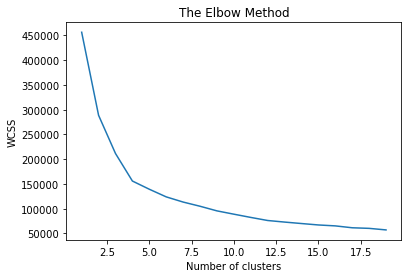

In [18]:
X = np.array(passes)


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
N_clusters = 5
X = np.array(passes)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)


In [20]:
kmeans.cluster_centers_

array([[ 1.29787234e+00, -1.56271479e+00,  1.85152665e+01,
         4.70489362e+01,  2.76212766e+01,  4.15893617e+01,
         1.46787234e+01,  8.93617021e-01,  4.25531915e-02,
         6.38297872e-02],
       [ 1.57500000e+00,  6.54935227e-01,  2.40722236e+01,
         7.62300000e+01,  5.24600000e+01,  9.24800000e+01,
         6.43050000e+01,  6.25000000e-01,  3.00000000e-01,
         7.50000000e-02],
       [ 1.36000000e+00, -4.72865417e-01,  1.87791159e+01,
         6.92400000e+01,  2.73780000e+01,  7.24120000e+01,
         2.32380000e+01,  9.20000000e-01,  2.00000000e-02,
         6.00000000e-02],
       [ 1.44444444e+00,  9.07153165e-01,  2.07237618e+01,
         4.82634921e+01,  5.13222222e+01,  4.92523810e+01,
         6.48365079e+01,  9.36507937e-01,  3.17460317e-02,
         3.17460317e-02],
       [ 1.36666667e+00,  2.11482997e-01,  1.72961085e+01,
         2.78566667e+01,  2.69966667e+01,  2.13966667e+01,
         2.92533333e+01,  8.33333333e-01,  3.33333333e-02,
         1.

In [21]:
passes['n_cluster'] = cluster_labels
passes.head(30)

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,n_cluster
17873,1,-2.246635,14.227438,46.5,13.1,37.6,2.0,1,0,0,0
17879,1,-2.234843,8.761849,20.8,21.3,15.4,14.4,1,0,0,4
17892,1,-3.111602,10.004499,54.7,46.7,44.7,46.4,1,0,0,3
17911,1,1.587962,23.303432,63.6,26.7,63.2,50.0,1,0,0,2
17942,1,-2.596366,14.268847,58.1,21.3,45.9,13.9,1,0,0,0
17963,1,-1.389793,15.554099,56.7,30.6,59.5,15.3,1,0,0,2
17976,1,0.208316,12.571794,81.4,34.9,93.7,37.5,1,0,0,2
17996,1,0.899405,18.647251,74.9,54.5,86.5,69.1,1,0,0,1
18016,1,1.312253,12.515989,60.4,53.8,63.6,65.9,1,0,0,3
18018,1,-1.843136,23.049513,69.5,50.9,63.3,28.7,1,0,0,2


In [22]:
passes['n_cluster'].value_counts()

3    63
2    50
0    47
1    40
4    30
Name: n_cluster, dtype: int64

In [23]:
sorted(passes['n_cluster'].unique())

[0, 1, 2, 3, 4]

reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

In [24]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_final)

In [25]:
centroids

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
0,1.297872,-1.562715,18.515267,47.048936,27.621277,41.589362,14.678723,0.893617,0.042553,0.063830
1,1.575000,0.654935,24.072224,76.230000,52.460000,92.480000,64.305000,0.625000,0.300000,0.075000
2,1.360000,-0.472865,18.779116,69.240000,27.378000,72.412000,23.238000,0.920000,0.020000,0.060000
3,1.444444,0.907153,20.723762,48.263492,51.322222,49.252381,64.836508,0.936508,0.031746,0.031746
4,1.366667,0.211483,17.296108,27.856667,26.996667,21.396667,29.253333,0.833333,0.033333,0.133333


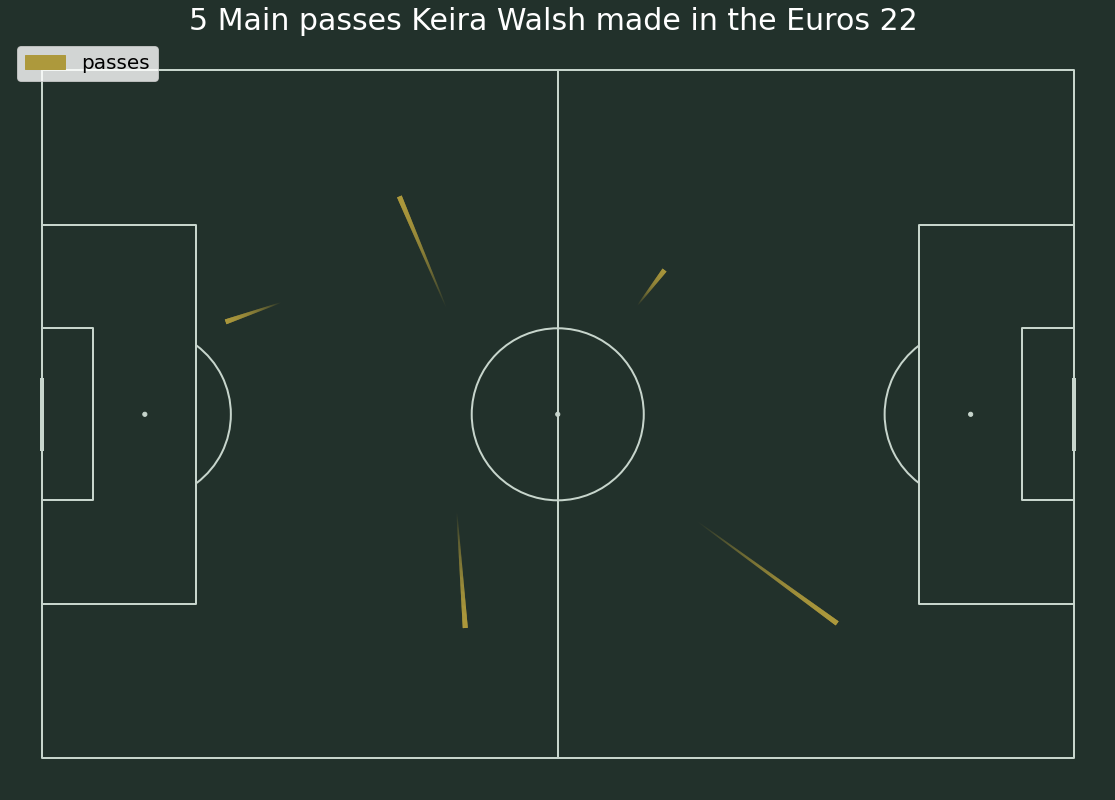

In [26]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

lc1 = pitch.lines(centroids['start_x'], centroids['start_y'],
                  centroids['end_x'], centroids['end_y'],
                  lw=5, transparent=True, comet=True,
                  color='#ad993c', ax=ax)
# Plot the legend
red_patch = mpatches.Patch(color='#ad993c', label='passes')
ax.legend(handles=[red_patch], fontsize=20, loc='upper left')
# Set the title
ax.set_title(f'5 Main passes Keira Walsh made in the Euros 22 ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

In [27]:
passes['n_cluster'].value_counts()

3    63
2    50
0    47
1    40
4    30
Name: n_cluster, dtype: int64

In [28]:
#passes = euro22[euro22.player == 'Keira Walsh']
passes_0 = passes[passes.n_cluster == 0]
passes_0

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,n_cluster
17873,1,-2.246635,14.227438,46.5,13.1,37.6,2.0,1,0,0,0
17942,1,-2.596366,14.268847,58.1,21.3,45.9,13.9,1,0,0,0
18123,1,-0.211093,14.317822,32.5,7.9,46.5,4.9,0,0,1,0
18309,2,-0.468698,8.854942,49.7,6.7,57.6,2.7,1,0,0,0
18328,2,-1.645285,13.437262,59.5,18.4,58.5,5.0,1,0,0,0
18360,2,0.682317,10.307764,42.5,13.6,50.5,20.1,0,1,0,0
18447,2,-0.813099,28.082912,34.1,27.1,53.4,6.7,1,0,0,0
18483,2,3.038004,20.308865,65.2,9.6,45.0,11.7,1,0,0,0
18504,2,-1.765955,8.766413,40.4,33.6,38.7,25.0,1,0,0,0
18630,2,-1.673878,14.577380,45.7,38.4,44.2,23.9,1,0,0,0


In [29]:
def plot_clusters(df, name):
    n_clusters = df['n_cluster'].nunique()
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)
    
    colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    
    for lbl, col in zip(passes['n_cluster'].unique(), colors):
        #df_cluster = passes[passes['n_cluster'] == lbl]
        lc1 = pitch.arrows(df[df['n_cluster'] == lbl]['start_x'], 
                    df[df['n_cluster'] == lbl]['start_y'],
                    df[df['n_cluster'] == lbl]['end_x'],
                    df[df['n_cluster'] == lbl]['end_y'],
                    width=2,headwidth=6, headlength=5, headaxislength=12,color=col,ax=ax,
                       label=lbl)

    ax.legend(loc='lower right')
    ax.set_title(name, fontsize=20, color = 'w')
    plt.show()

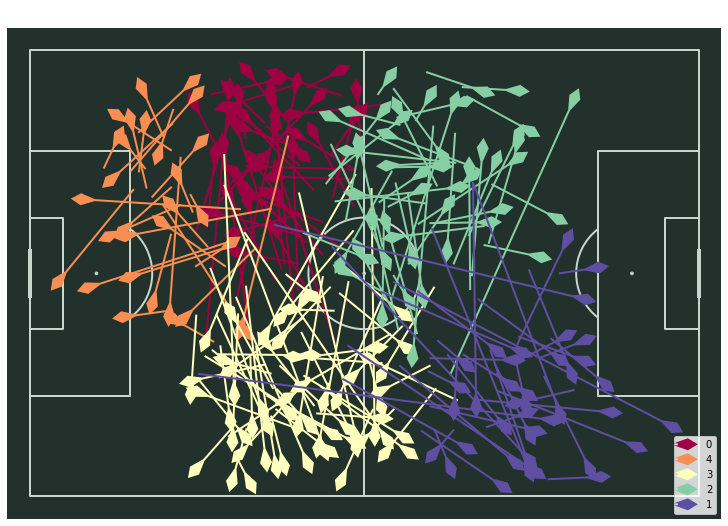

In [30]:
plot_clusters(passes, 'Keira Walsh')

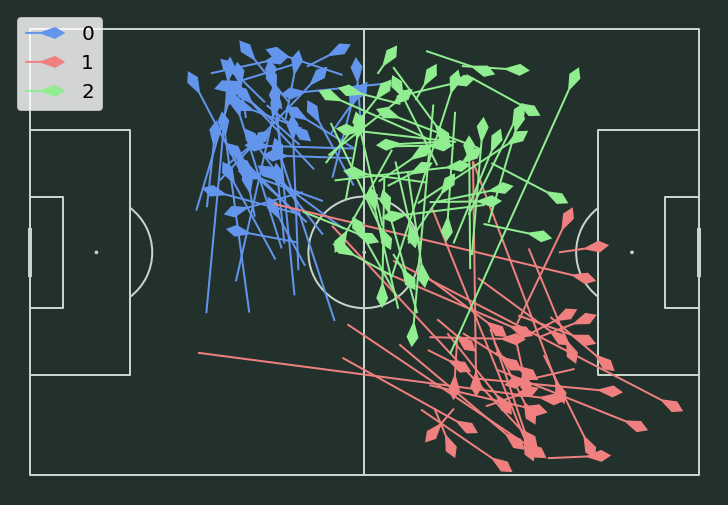

In [31]:
#for c in sorted(passes['n_cluster'].unique()) :
    
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)

lc1 = pitch.arrows(passes[passes['n_cluster'] == 0]['start_x'], 
                      passes[passes['n_cluster'] == 0]['start_y'],
                      passes[passes['n_cluster'] == 0]['end_x'],
                      passes[passes['n_cluster'] == 0]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='cornflowerblue',ax=ax,
                       label=0)
lc1 = pitch.arrows(passes[passes['n_cluster'] == 1]['start_x'], 
                      passes[passes['n_cluster'] == 1]['start_y'],
                      passes[passes['n_cluster'] == 1]['end_x'],
                      passes[passes['n_cluster'] == 1]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='lightcoral',ax=ax,
                       label=1)
lc1 = pitch.arrows(passes[passes['n_cluster'] == 2]['start_x'], 
                      passes[passes['n_cluster'] == 2]['start_y'],
                      passes[passes['n_cluster'] == 2]['end_x'],
                      passes[passes['n_cluster'] == 2]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='lightgreen',ax=ax,
                       label=2)
# Plot the legend

ax.legend(fontsize=20, loc='upper left')
# Set the title
#ax.set_title(f'5 Main passes Keira Walsh made in the past 3 years ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

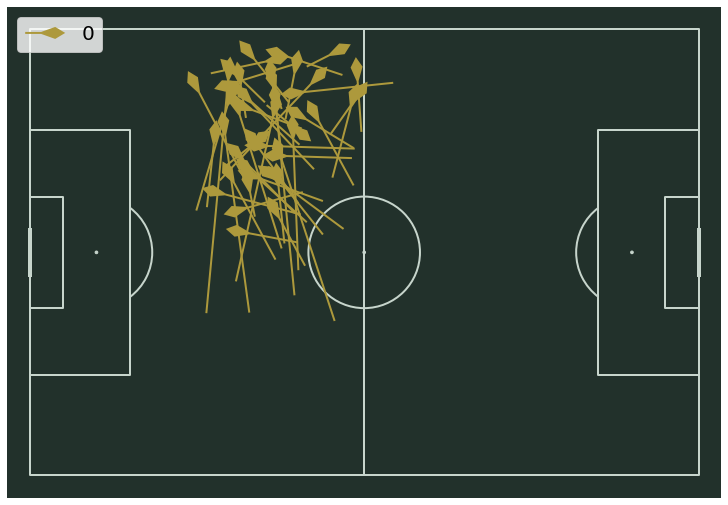

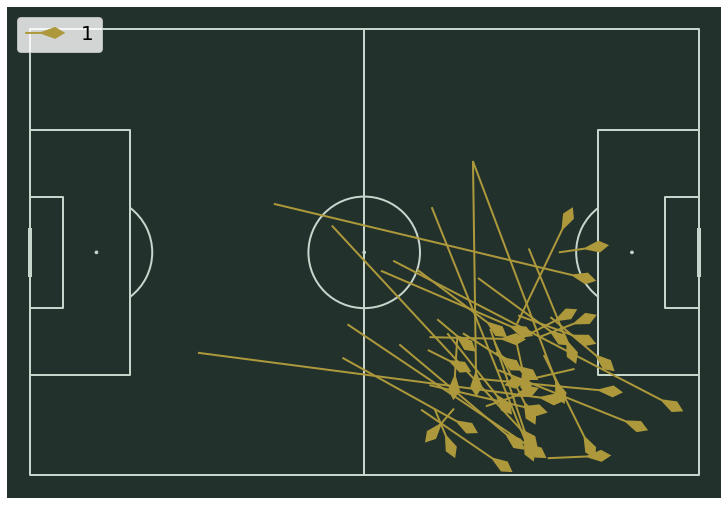

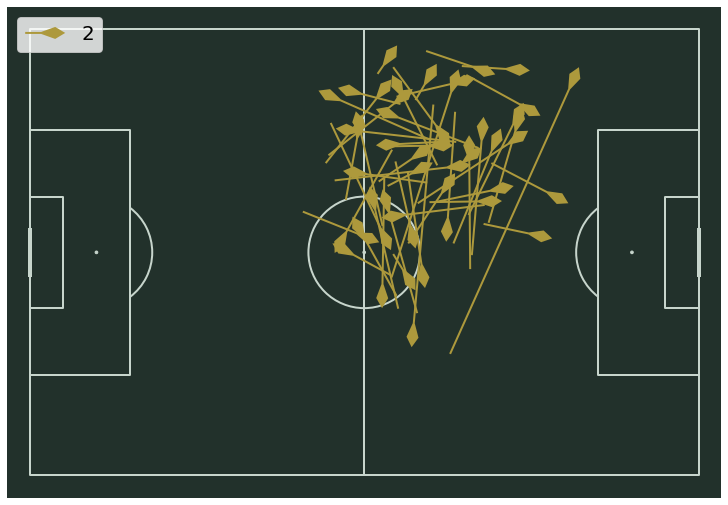

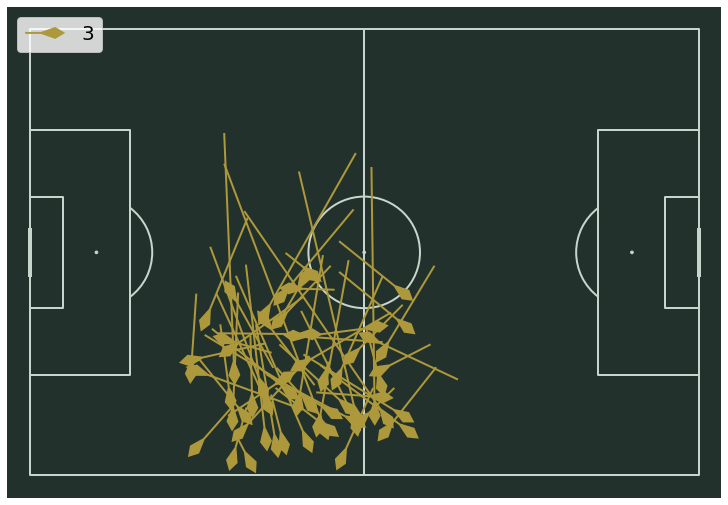

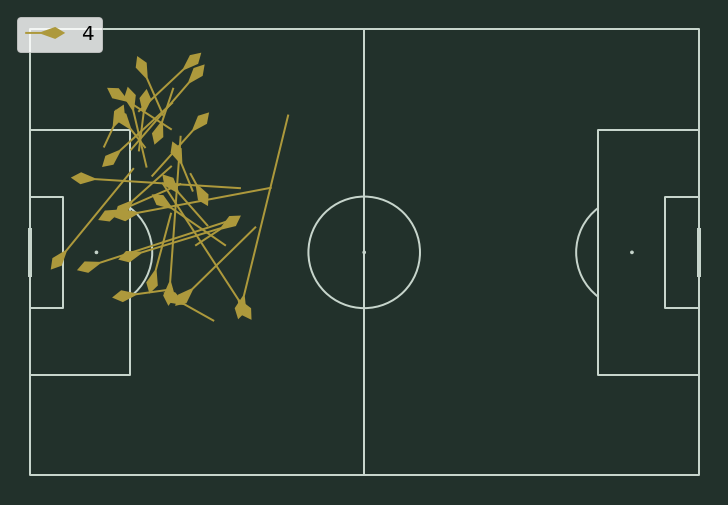

In [32]:
# pulling out passes for analysis by cluster

for c in sorted(passes['n_cluster'].unique()) :
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)

    lc1 = pitch.arrows(passes[passes['n_cluster'] == c]['start_x'], 
                      passes[passes['n_cluster'] == c]['start_y'],
                      passes[passes['n_cluster'] == c]['end_x'],
                      passes[passes['n_cluster'] == c]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='#ad993c',ax=ax,
                       label=c)
# Plot the legend

    ax.legend(fontsize=20, loc='upper left')
# Set the title
#ax.set_title(f'5 Main passes Keira Walsh made in the past 3 years ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')
    


In [33]:
def pass_analysis(cluster,df):
    df = df[df.n_cluster == cluster]
    
    analysis = wc19.iloc[df.index]
    
    return analysis

In [34]:
analysis_0 = pass_analysis(0,passes)

In [35]:
analysis_0.match_id.value_counts()

22936    12
69258    10
69199     9
68362     9
68337     7
Name: match_id, dtype: int64

In [36]:
analysis_0.pass_recipient.value_counts()

Millie Bright         18
Demi Stokes           10
Alex Greenwood         7
Toni Duggan            4
Abbie McManus          4
Bethany Mead           2
Francesca Kirby        1
Karen Julia Carney     1
Name: pass_recipient, dtype: int64

In [37]:
analysis_1 = pass_analysis(1,passes)
analysis_1 

,period,pass_angle,pass_length,pass_recipient,possession_team,possession_team_id,player,player_id,match_id,pass_outcome_Complete,...,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
17996,1,0.899405,18.647251,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,74.9,54.5,86.5,69.1,1,0,0
18071,1,1.181161,22.377220,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,89.5,39.3,98.0,60.0,0,1,0
18074,1,-0.143452,9.093404,Jill Scott,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,94.9,40.0,103.9,38.7,0,1,0
18224,1,-0.368500,10.826818,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,91.6,55.1,101.7,51.2,1,0,0
18301,2,1.210263,46.488815,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,79.5,23.7,95.9,67.2,0,1,0
18346,2,0.599175,19.859507,Nikita Parris,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,70.2,68.2,86.6,79.4,1,0,0
18348,2,-0.334328,10.056838,Jill Scott,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,81.8,67.6,91.3,64.3,1,0,0
18518,2,0.700696,15.044600,Abbie McManus,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,93.4,51.6,104.9,61.3,1,0,0
18696,2,-0.477584,12.836277,Karen Julia Carney,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,86.8,56.1,98.2,50.2,1,0,0
19731,1,1.176803,9.638465,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,68337,1,...,0,0,0,72.6,68.0,76.3,76.9,1,0,0


In [38]:
analysis_1.match_id.value_counts()

22936    9
69199    9
69258    8
68362    8
68337    6
Name: match_id, dtype: int64

In [39]:
analysis_1.describe()

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
count,40.000000,40.000000,40.000000,40.0,40.0,40.00000,40.0,40.0,40.0,40.0,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,1.575000,0.654935,24.072224,865.0,4658.0,58504.92500,1.0,0.0,0.0,0.0,0.0,0.0,76.230000,52.460000,92.480000,64.305000,0.62500,0.300000,0.075000
std,0.500641,0.738874,16.067440,0.0,0.0,19413.15149,0.0,0.0,0.0,0.0,0.0,0.0,14.178843,12.083806,10.009616,10.928203,0.49029,0.464095,0.266747
min,1.000000,-1.124521,8.015610,865.0,4658.0,22936.00000,1.0,0.0,0.0,0.0,0.0,0.0,30.200000,23.600000,70.900000,31.900000,0.00000,0.000000,0.000000
25%,1.000000,0.232561,11.493704,865.0,4658.0,68337.00000,1.0,0.0,0.0,0.0,0.0,0.0,71.100000,44.275000,86.575000,57.525000,0.00000,0.000000,0.000000
50%,2.000000,0.595523,19.999758,865.0,4658.0,68362.00000,1.0,0.0,0.0,0.0,0.0,0.0,78.600000,55.050000,91.150000,65.800000,1.00000,0.000000,0.000000
75%,2.000000,1.127795,29.086472,865.0,4658.0,69199.00000,1.0,0.0,0.0,0.0,0.0,0.0,86.900000,58.525000,99.000000,72.825000,1.00000,1.000000,0.000000
max,2.000000,2.915374,66.260470,865.0,4658.0,69258.00000,1.0,0.0,0.0,0.0,0.0,0.0,97.700000,76.900000,117.200000,79.400000,1.00000,1.000000,1.000000


In [40]:
analysis_1.pass_recipient.value_counts()

Lucy Bronze           13
Jill Scott             8
Nikita Parris          7
Rachel Daly            3
Francesca Kirby        2
Lucy Staniforth        2
Leah Williamson        1
Toni Duggan            1
Karen Julia Carney     1
Stephanie Houghton     1
Abbie McManus          1
Name: pass_recipient, dtype: int64

In [41]:
analysis_2 = pass_analysis(2,passes)
analysis_2 

,period,pass_angle,pass_length,pass_recipient,possession_team,possession_team_id,player,player_id,match_id,pass_outcome_Complete,...,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
17911,1,1.587962,23.303432,Stephanie Houghton,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,63.6,26.7,63.2,50.0,1,0,0
17963,1,-1.389793,15.554099,Alex Greenwood,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,56.7,30.6,59.5,15.3,1,0,0
17976,1,0.208316,12.571794,Nikita Parris,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,81.4,34.9,93.7,37.5,1,0,0
18018,1,-1.843136,23.049513,Millie Bright,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,69.5,50.9,63.3,28.7,1,0,0
18025,1,1.423544,21.128654,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,67.8,25.5,70.9,46.4,1,0,0
18060,1,2.078812,21.174040,Stephanie Houghton,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,65.0,21.6,54.7,40.1,1,0,0
18067,1,-1.179457,22.284748,Alex Greenwood,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,76.0,38.4,84.5,17.8,1,0,0
18104,1,-0.016948,11.801695,Francesca Kirby,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,64.2,21.0,76.0,20.8,1,0,0
18162,1,1.639358,23.354872,Jill Scott,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,76.3,14.8,74.7,38.1,1,0,0
18170,1,-2.078493,16.249615,Millie Bright,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,65.8,47.8,57.9,33.6,1,0,0


In [42]:
analysis_2.match_id.value_counts()

22936    16
69199    12
68362    10
68337     9
69258     3
Name: match_id, dtype: int64

In [43]:
analysis_2.describe()

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
count,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.360000,-0.472865,18.779116,871.900000,4658.0,54075.820000,1.0,0.0,0.0,0.0,0.0,0.0,69.240000,27.378000,72.412000,23.238000,0.920000,0.020000,0.060000
std,0.484873,1.526231,8.962917,48.790368,0.0,21581.557493,0.0,0.0,0.0,0.0,0.0,0.0,8.360183,12.574712,12.480182,13.195359,0.274048,0.141421,0.239898
min,1.000000,-3.030936,5.700877,865.000000,4658.0,22936.000000,1.0,0.0,0.0,0.0,0.0,0.0,49.000000,3.900000,51.800000,2.900000,0.000000,0.000000,0.000000
25%,1.000000,-1.462189,13.123624,865.000000,4658.0,22936.000000,1.0,0.0,0.0,0.0,0.0,0.0,64.825000,20.125000,62.800000,13.425000,1.000000,0.000000,0.000000
50%,1.000000,-0.630547,17.676545,865.000000,4658.0,68349.500000,1.0,0.0,0.0,0.0,0.0,0.0,69.350000,26.900000,71.500000,20.800000,1.000000,0.000000,0.000000
75%,2.000000,0.456107,22.375540,865.000000,4658.0,69199.000000,1.0,0.0,0.0,0.0,0.0,0.0,76.225000,34.850000,81.325000,33.000000,1.000000,0.000000,0.000000
max,2.000000,3.088612,56.352196,1210.000000,4658.0,69258.000000,1.0,0.0,0.0,0.0,0.0,0.0,82.800000,58.200000,98.500000,57.000000,1.000000,1.000000,1.000000


In [44]:
analysis_2.pass_recipient.value_counts()

Millie Bright         10
Demi Stokes            9
Toni Duggan            5
Alex Greenwood         4
Francesca Kirby        4
Bethany Mead           4
Jill Scott             4
Ellen White            2
Georgia Stanway        2
Stephanie Houghton     2
Lucy Bronze            2
Karen Julia Carney     1
Nikita Parris          1
Name: pass_recipient, dtype: int64

In [45]:
silhouette_score(X, cluster_labels)

0.3041198685440803

## Progressive Passes -- WC 19 

In [46]:
prog_passes = wc19[(wc19['player_id'] == 4658) & 
                  (wc19['end_x'] > wc19['start_x']) &
                 (wc19['pass_outcome_Complete'] == 1)][columns_final]

In [47]:
N_clusters =5
X_prog = np.array(prog_passes)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
kmeans.fit(X_prog)
cluster_labels = kmeans.predict(X_prog)

In [48]:
kmeans.cluster_centers_

array([[ 1.41176471e+00, -7.63238336e-01,  1.71895888e+01,
         3.06588235e+01,  2.51176471e+01,  3.83764706e+01,
         1.25470588e+01,  8.23529412e-01,  5.88235294e-02,
         1.17647059e-01],
       [ 1.38235294e+00, -3.17097933e-01,  1.75668938e+01,
         6.72823529e+01,  2.61264706e+01,  7.74852941e+01,
         2.03382353e+01,  8.52941176e-01,  5.88235294e-02,
         8.82352941e-02],
       [ 1.41666667e+00,  9.40964503e-01,  5.11232862e+01,
         5.53750000e+01,  3.37500000e+01,  8.37333333e+01,
         6.92166667e+01,  2.50000000e-01,  6.66666667e-01,
         8.33333333e-02],
       [ 1.58620690e+00,  4.53765406e-01,  1.76181558e+01,
         7.99034483e+01,  5.57379310e+01,  9.31827586e+01,
         6.29344828e+01,  7.24137931e-01,  2.06896552e-01,
         6.89655172e-02],
       [ 1.48387097e+00,  7.90442070e-01,  1.95400930e+01,
         4.20161290e+01,  5.29032258e+01,  5.24483871e+01,
         6.60129032e+01,  9.35483871e-01,  0.00000000e+00,
         6.

In [49]:
prog_passes['n_cluster'] = cluster_labels
prog_passes.head(30)

,period,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,n_cluster
17963,1,-1.389793,15.554099,56.7,30.6,59.5,15.3,1,0,0,1
17976,1,0.208316,12.571794,81.4,34.9,93.7,37.5,1,0,0,1
17996,1,0.899405,18.647251,74.9,54.5,86.5,69.1,1,0,0,3
18016,1,1.312253,12.515989,60.4,53.8,63.6,65.9,1,0,0,4
18025,1,1.423544,21.128654,67.8,25.5,70.9,46.4,1,0,0,1
18044,1,1.543776,14.805405,39.6,54.9,40.0,69.7,1,0,0,4
18067,1,-1.179457,22.284748,76.0,38.4,84.5,17.8,1,0,0,1
18071,1,1.181161,22.377220,89.5,39.3,98.0,60.0,0,1,0,3
18074,1,-0.143452,9.093404,94.9,40.0,103.9,38.7,0,1,0,3
18104,1,-0.016948,11.801695,64.2,21.0,76.0,20.8,1,0,0,1


In [50]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_final)

In [51]:
centroids.pass_length.mean()

24.60760351296822

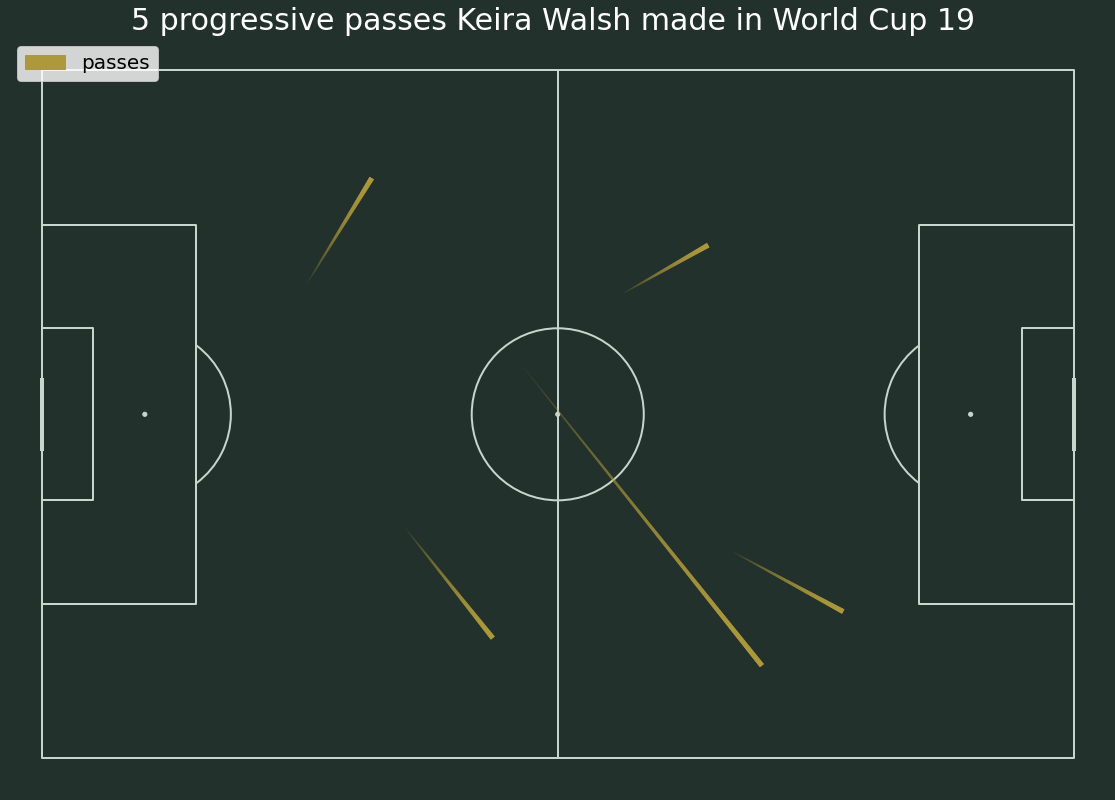

In [52]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

lc1 = pitch.lines(centroids['start_x'], centroids['start_y'],
                  centroids['end_x'], centroids['end_y'],
                  lw=5, transparent=True, comet=True,
                  color='#ad993c', ax=ax)
# Plot the legend
red_patch = mpatches.Patch(color='#ad993c', label='passes')
ax.legend(handles=[red_patch], fontsize=20, loc='upper left')
# Set the title
ax.set_title(f'5 progressive passes Keira Walsh made in World Cup 19 ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

In [53]:
prog_passes['n_cluster'].value_counts()

1    34
4    31
3    29
0    17
2    12
Name: n_cluster, dtype: int64

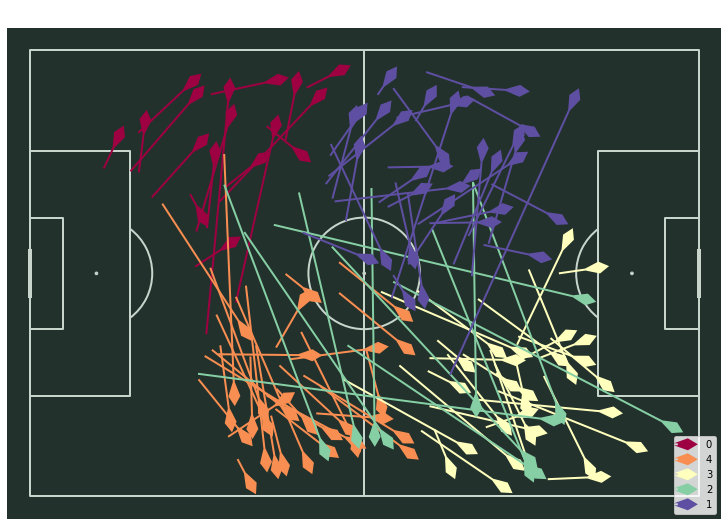

In [54]:
plot_clusters(prog_passes, 'Keira Walsh')

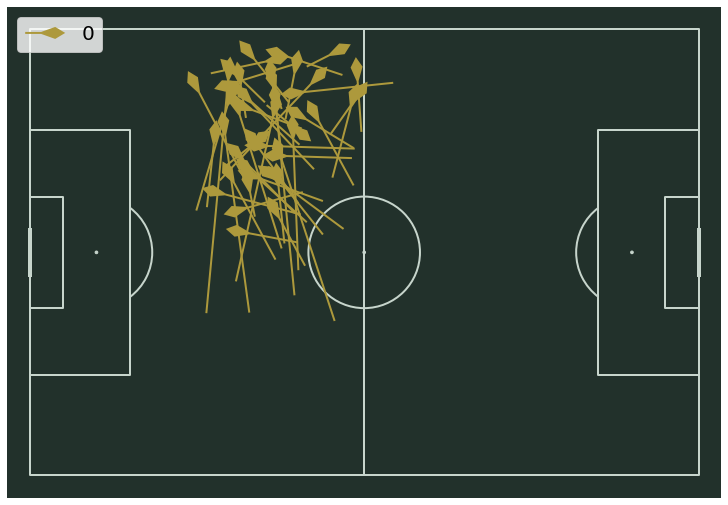

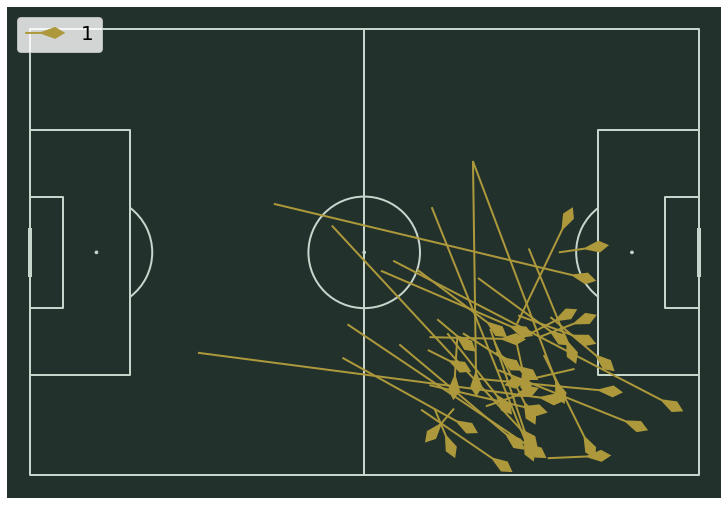

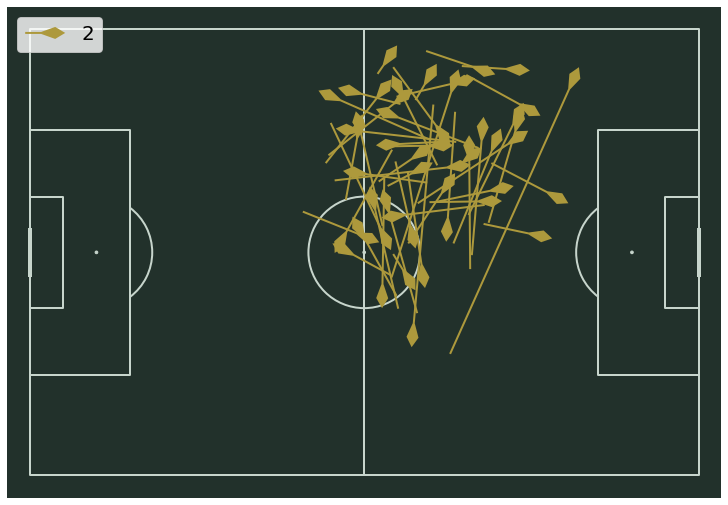

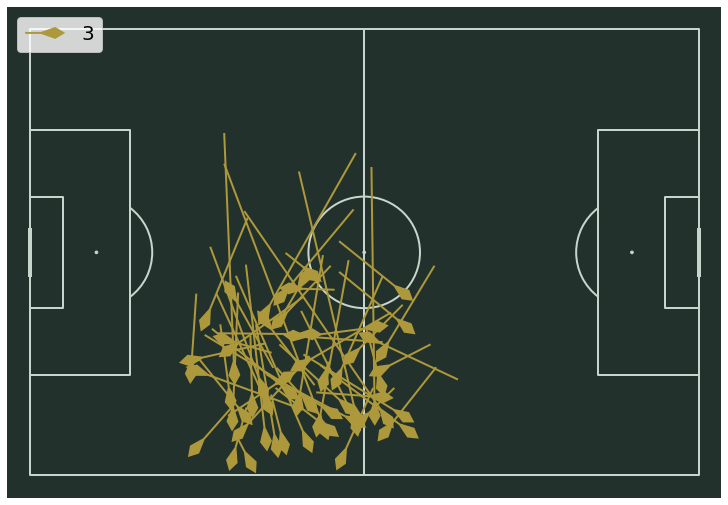

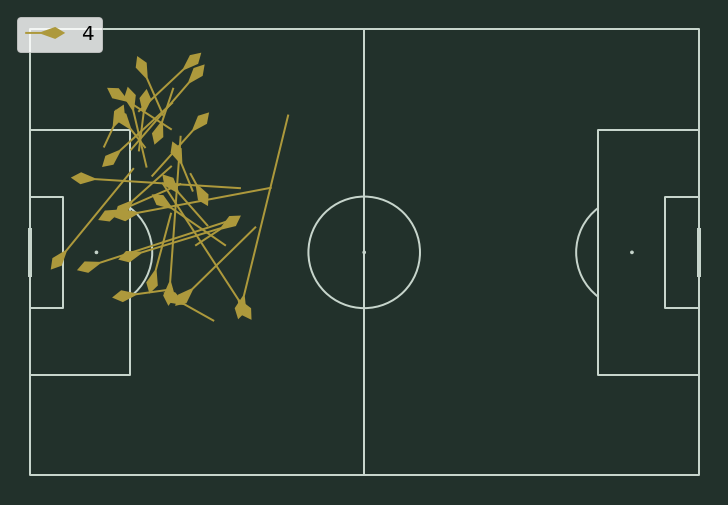

In [55]:
# pulling out passes for analysis by cluster

for c in sorted(prog_passes['n_cluster'].unique()) :
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)

    lc1 = pitch.arrows(passes[passes['n_cluster'] == c]['start_x'], 
                      passes[passes['n_cluster'] == c]['start_y'],
                      passes[passes['n_cluster'] == c]['end_x'],
                      passes[passes['n_cluster'] == c]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='#ad993c',ax=ax,
                       label=c)
# Plot the legend

    ax.legend(fontsize=20, loc='upper left')
# Set the title
#ax.set_title(f'5 Main passes Keira Walsh made in the past 3 years ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')
    


In [56]:
prog_2 = pass_analysis(2,prog_passes)

In [57]:
prog_2

,period,pass_angle,pass_length,pass_recipient,possession_team,possession_team_id,player,player_id,match_id,pass_outcome_Complete,...,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
18301,2,1.210263,46.488815,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,22936,1,...,0,0,0,79.5,23.7,95.9,67.2,0,1,0
20072,1,0.234367,59.424576,Rachel Daly,England Women's,865,Keira Walsh,4658.0,68337,1,...,0,0,0,43.8,31.3,101.6,45.1,0,1,0
20215,1,1.189156,49.135017,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,68337,1,...,0,0,0,72.1,31.9,90.4,77.5,1,0,0
37276,1,1.340190,47.250820,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,68362,1,...,0,0,0,48.3,25.5,59.1,71.5,1,0,0
37341,2,0.591871,43.017323,Nikita Parris,England Women's,865,Keira Walsh,4658.0,68362,1,...,0,0,0,57.0,52.9,92.7,76.9,0,1,0
37380,2,1.210259,53.008020,Nikita Parris,England Women's,865,Keira Walsh,4658.0,68362,1,...,0,0,0,34.9,24.1,53.6,73.7,0,1,0
40425,2,1.556613,42.304256,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,69199,1,...,0,0,0,79.5,23.6,80.1,65.9,0,1,0
40445,2,0.130158,66.260470,Rachel Daly,England Women's,865,Keira Walsh,4658.0,69199,1,...,0,0,0,30.2,58.0,95.9,66.6,0,1,0
40497,1,1.557866,46.403877,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,69258,1,...,0,0,0,61.3,24.7,61.9,71.1,1,0,0
40520,1,0.968727,47.320610,Lucy Bronze,England Women's,865,Keira Walsh,4658.0,69258,1,...,0,0,0,38.5,32.6,65.3,71.6,0,1,0


In [58]:
prog_2.match_id.value_counts()

69258    4
68362    3
69199    2
68337    2
22936    1
Name: match_id, dtype: int64

In [52]:
prog_1 = pass_analysis(1,prog_passes)
prog_1.pass_length.mean() 

17.566893776470593

In [60]:
prog_1.match_id.value_counts()

22936    11
69199    10
68337     6
68362     4
69258     3
Name: match_id, dtype: int64

In [61]:
prog_1.pass_recipient.value_counts()

Demi Stokes           6
Toni Duggan           6
Francesca Kirby       4
Bethany Mead          4
Jill Scott            3
Alex Greenwood        3
Georgia Stanway       2
Ellen White           2
Karen Julia Carney    2
Lucy Bronze           1
Nikita Parris         1
Name: pass_recipient, dtype: int64

In [62]:
prog_3 = pass_analysis(3,prog_passes)

In [63]:
prog_3.match_id.value_counts()

22936    8
69199    6
68362    6
69258    5
68337    4
Name: match_id, dtype: int64

In [64]:
prog_3.pass_recipient.value_counts()

Jill Scott            8
Lucy Bronze           8
Nikita Parris         5
Lucy Staniforth       2
Francesca Kirby       2
Abbie McManus         1
Rachel Daly           1
Toni Duggan           1
Karen Julia Carney    1
Name: pass_recipient, dtype: int64